In [1]:
import pandas as pd
from pandasql import sqldf

In [4]:
dfs = []
for i in range(442):
    try:
        dfs.append(pd.read_csv("../reports/results/range_name_{}.csv".format(str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))        
    except:
        dfs.append(pd.read_csv("../reports/results/CO_RFI_vs_BN_call_{}.csv".format(str(i).zfill(3))).drop(["Unnamed: 0"], axis=1))                
df = pd.concat(dfs, axis=0)

In [5]:
df.head()


,flop,board_type,0b,1b,2b,profit
0,"[14, 14, 13]",two-tone,0,0,0,1.053372
1,"[14, 14, 13]",two-tone,1,1,1,1.684726
2,"[14, 14, 13]",two-tone,2,2,2,1.828984
3,"[14, 14, 13]",two-tone,3,2,2,2.109554
4,"[14, 14, 13]",two-tone,7,5,4,2.162975


In [6]:
df2 = sqldf("""select * from df a
        INNER JOIN (select flop, max(profit) AS max_profit from df group by 1) b on
        b.flop = a.flop and a.profit = b.max_profit
       order by 1 desc"""
      ,globals())
df2.to_csv("../reports/condensed_results/CO_RFI_vs_BN_call.csv")

In [7]:
df2.columns = ["_" + col for col in df2.columns]

In [8]:
sqldf("select _0b, _1b, _2b, count(*), max(_flop), min(_flop) from df2 group by 1,2,3 order by 4 desc" , globals())

,_0b,_1b,_2b,count(*),max(_flop),min(_flop)
0,1,1,1,229,"[9, 9, 5]","[10, 10, 6]"
1,2,2,2,46,"[9, 8, 7]","[11, 9, 7]"
2,1,0,0,37,"[9, 9, 4]","[10, 10, 2]"
3,1,0,1,24,"[8, 8, 5]","[12, 8, 2]"
4,1,1,2,14,"[9, 7, 4]","[10, 8, 4]"
5,1,2,1,12,"[12, 11, 4]","[10, 9, 2]"
6,8,6,4,8,"[14, 14, 13]","[14, 11, 11]"
7,16,10,6,8,"[9, 9, 7]","[10, 10, 8]"
8,3,2,2,7,"[14, 13, 9]","[12, 9, 9]"
9,8,6,3,6,"[14, 9, 9]","[12, 7, 7]"


/Users/petermyers/Desktop/Code/commons/venv/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x114895b70> has a label of '_profit' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


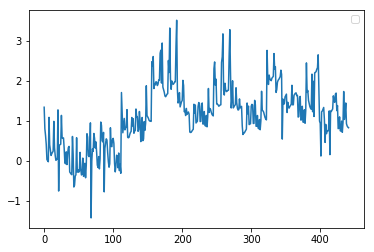

In [11]:
df2[["_profit"]].plot()

In [16]:
df2.columns = ["_flop", "_board_type", "_0b", "_1b", "_2b", "profit", "temp", "temp2"]
df2.drop(["temp", "temp2"], axis=1, inplace=True)

In [27]:
df2["rank1"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[0]).astype(int)
df2["rank2"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[1]).astype(int)
df2["rank3"] = df2["_flop"].apply(lambda x: x.replace("[","").replace("]","").split(",")[2]).astype(int)

In [28]:
def val_difference_from_val(val1, val2):
    return val1 - val2

df2['range'] = df2[["rank1", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['top_range'] = df2[["rank1", "rank2"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)
df2['bottom_range'] = df2[["rank2", "rank3"]].apply(lambda x: val_difference_from_val(*x), axis=1).astype(float)





In [29]:
df2

,_flop,_board_type,_0b,_1b,_2b,profit,rank1,rank2,rank3,range,top_range,bottom_range
0,"[9, 9, 8]",two-tone,16,11,10,1.333732,9,9,8,1.0,0.0,1.0
1,"[9, 9, 7]",two-tone,16,10,6,0.794836,9,9,7,2.0,0.0,2.0
2,"[9, 9, 6]",two-tone,16,11,8,0.626392,9,9,6,3.0,0.0,3.0
3,"[9, 9, 5]",two-tone,1,1,1,0.408262,9,9,5,4.0,0.0,4.0
4,"[9, 9, 4]",two-tone,1,0,0,0.024684,9,9,4,5.0,0.0,5.0
5,"[9, 9, 3]",two-tone,1,0,0,-0.003982,9,9,3,6.0,0.0,6.0
6,"[9, 9, 2]",two-tone,1,0,0,-0.028538,9,9,2,7.0,0.0,7.0
7,"[9, 8, 8]",two-tone,16,11,10,1.080869,9,8,8,1.0,1.0,0.0
8,"[9, 8, 7]",two-tone,2,2,2,0.395880,9,8,7,2.0,1.0,1.0
9,"[9, 8, 6]",two-tone,2,2,2,0.250720,9,8,6,3.0,1.0,2.0
